## Exploring tweets containing word "brexit" in days just before and just after Brexit vote

June 21 - June 30, 2016

This data set is quite small at only ~10,000 tweets, so it is much harder to find semantically interesting results than with charisma dataset. Still may be useful info for people interested specifically in Brexit

In [1]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [2]:
twit = Twords()
twit.data_path = "../data/java_collector/brexit"
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.set_Search_terms(["brexit"])
twit.create_Stop_words()

In [3]:
twit.get_java_tweets_from_csv_list()

In [4]:
# find how many tweets we have in original dataset
print "Total number of tweets:", len(twit.tweets_df)

Total number of tweets: 9970


# Standard cleaning

In [5]:
twit.keep_column_of_original_tweets()

In [6]:
twit.lower_tweets()

In [7]:
twit.keep_only_unicode_tweet_text()

In [8]:
twit.remove_urls_from_tweets()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.052 minutes
Tweets cleaned per minute: 192814.7


In [9]:
twit.remove_punctuation_from_tweets()

In [10]:
twit.drop_non_ascii_characters_from_tweets()

In [11]:
twit.drop_duplicate_tweets()

In [12]:
twit.drop_by_search_in_name()

In [13]:
twit.convert_tweet_dates_to_standard()

In [14]:
twit.sort_tweets_by_date()

In [15]:
len(twit.tweets_df)

8837

In [16]:
twit.keep_tweets_with_terms("brexit")

In [17]:
len(twit.tweets_df)

8100

# Create word_freq_df

In [18]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(1000)

Time to make words_string:  0.001 minutes
Time to tokenize:  0.019 minutes
Time to compute word bag:  0.017 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  0.6446 minutes


In [19]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background occurrences
98,unido,66,0.000846,6800.222878,8.824711,9
101,reino,65,0.000833,6697.189198,8.809443,9
106,tras,63,0.000808,3651.256034,8.202827,16
61,postbrexit,86,0.001103,3322.836179,8.108574,24
283,brexits,34,0.000436,2252.021862,7.719584,14
618,jatuh,17,0.000218,1970.519129,7.586052,8
296,europea,33,0.000423,1912.562684,7.556199,16
769,entender,14,0.000180,1622.780459,7.391896,8
370,inggris,27,0.000346,1564.824014,7.355529,16
140,uks,53,0.000680,1404.201867,7.247224,35


# Plot results with varying background cutoffs

## At least 100 background occurrences:

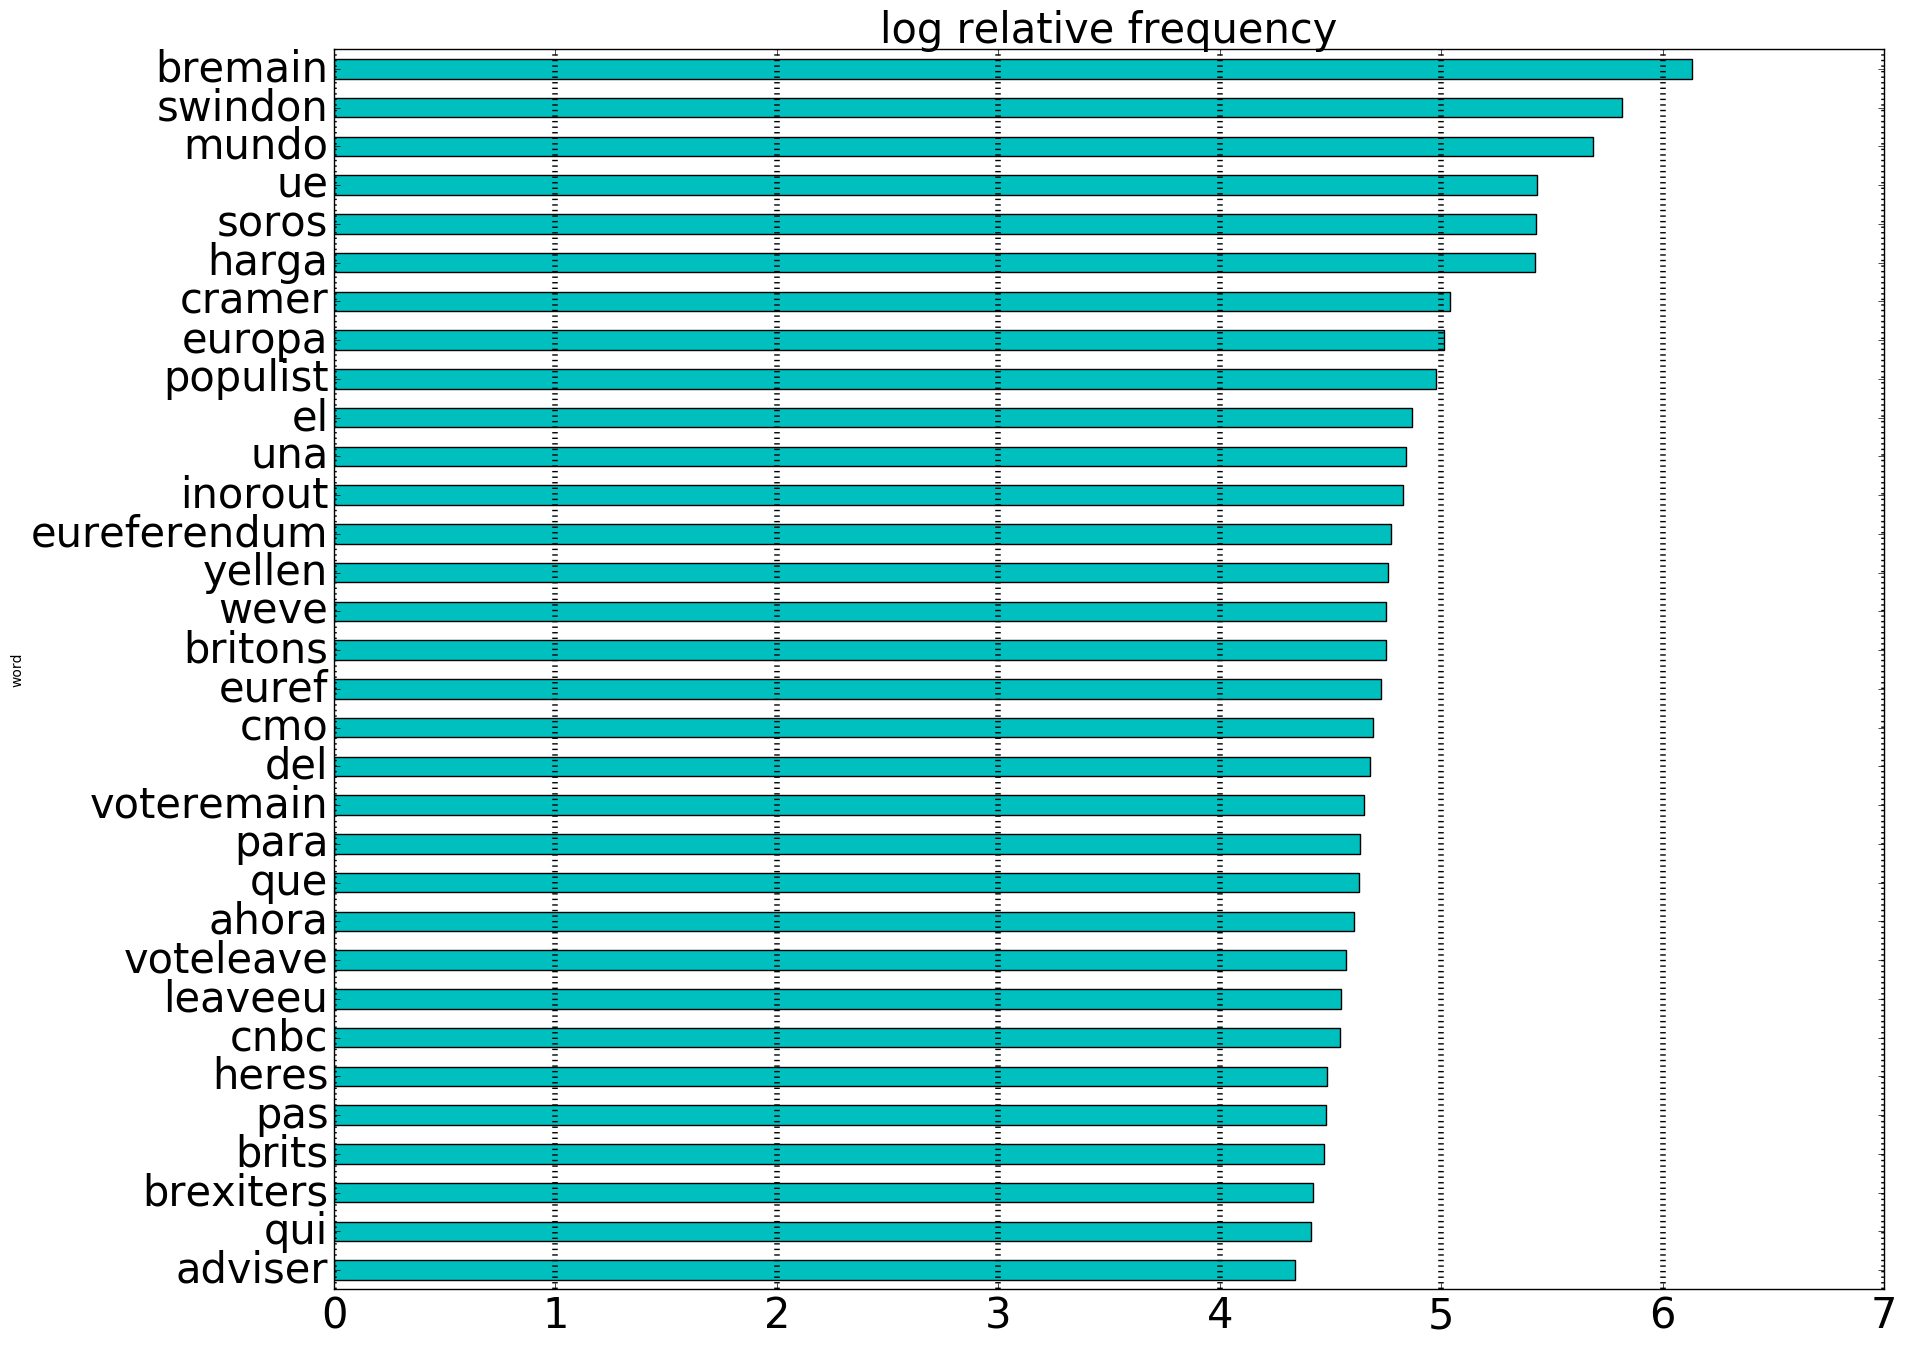

In [20]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## At least 500 background occurrences:

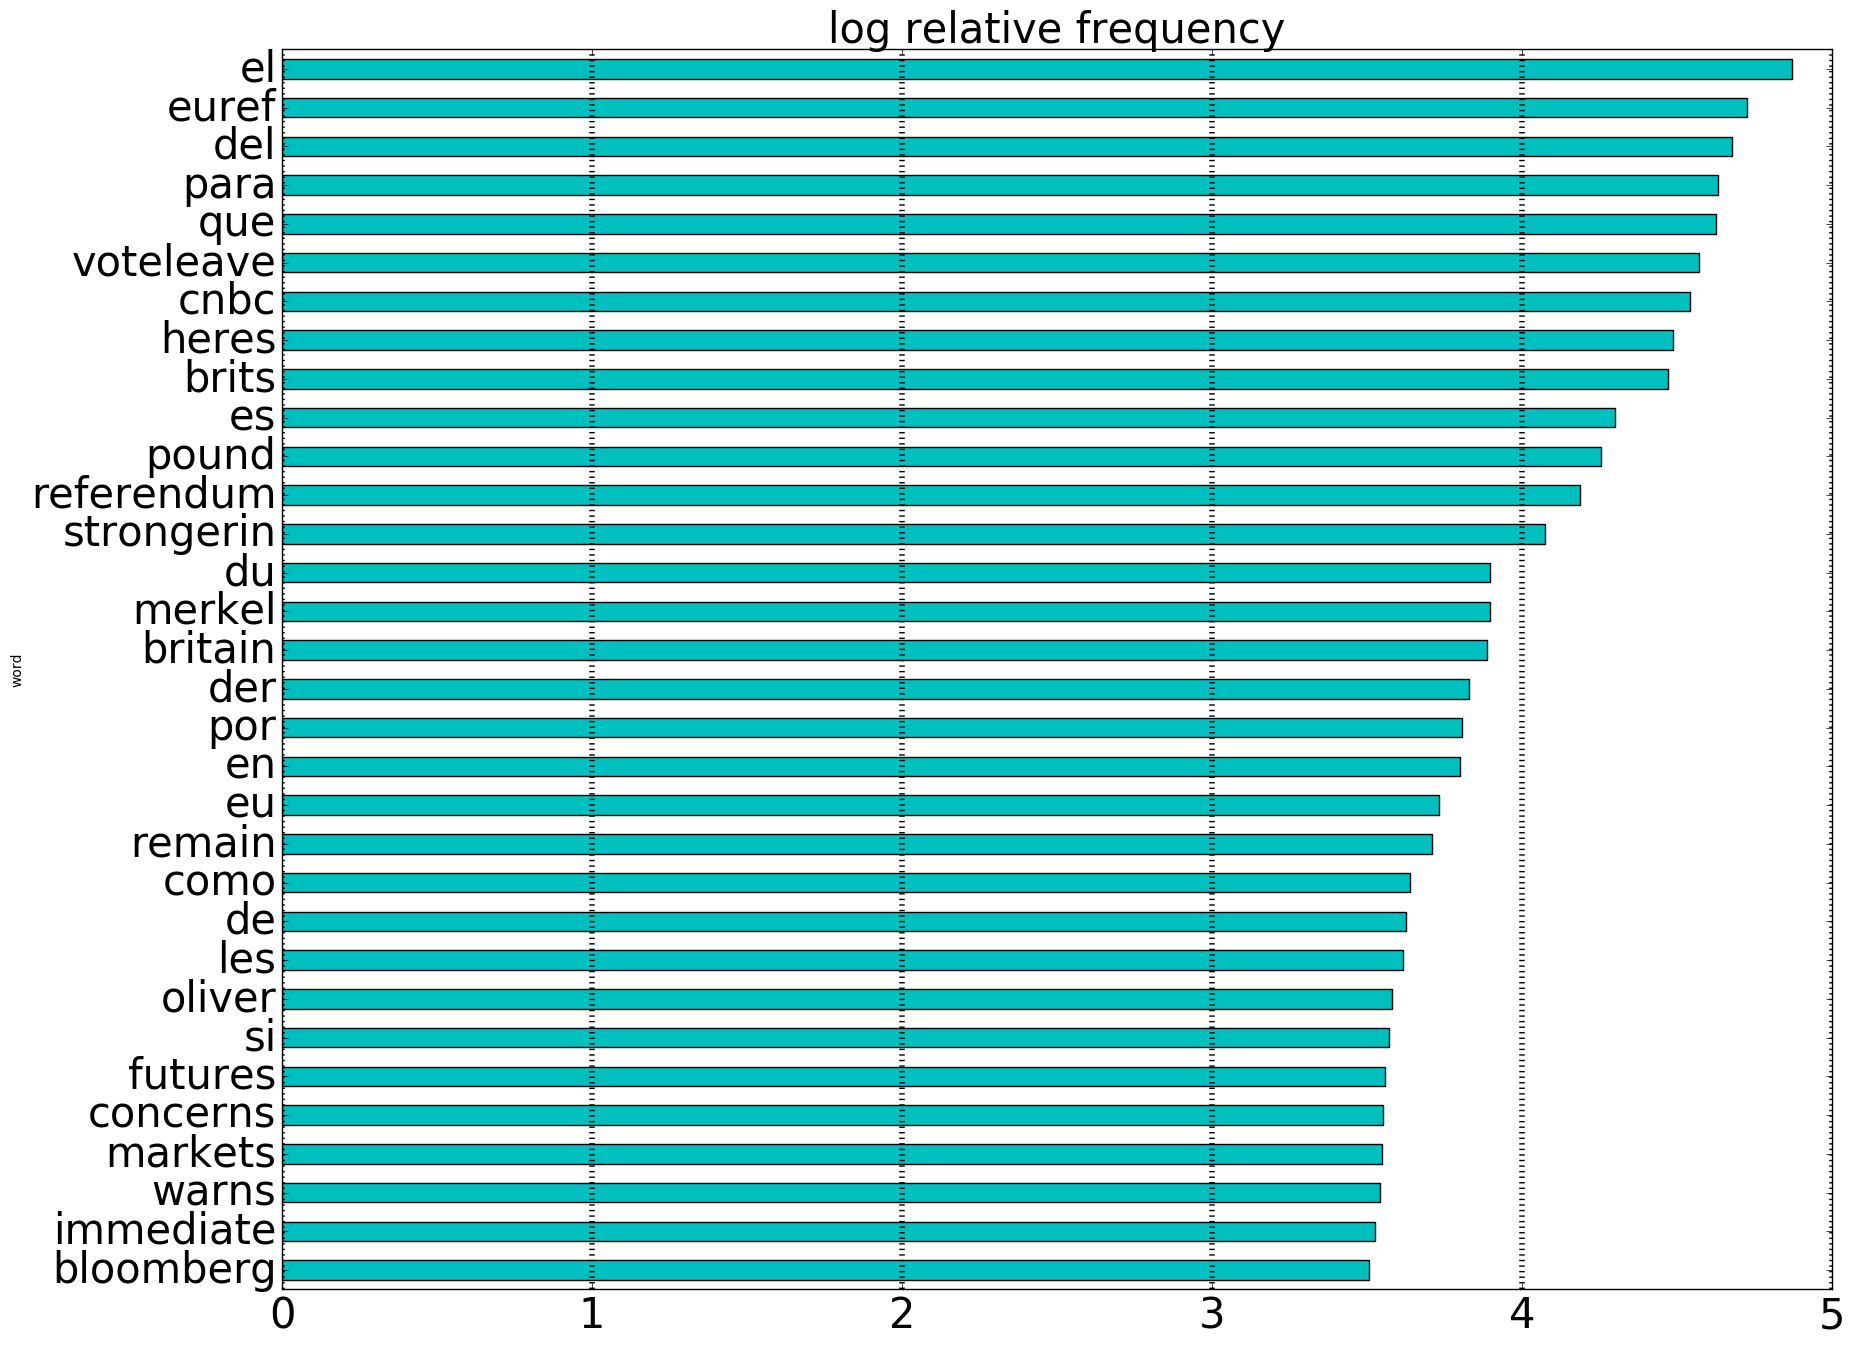

In [21]:
num_words_to_plot = 32
background_cutoff = 500
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

# At least 2000 background occurrences: 

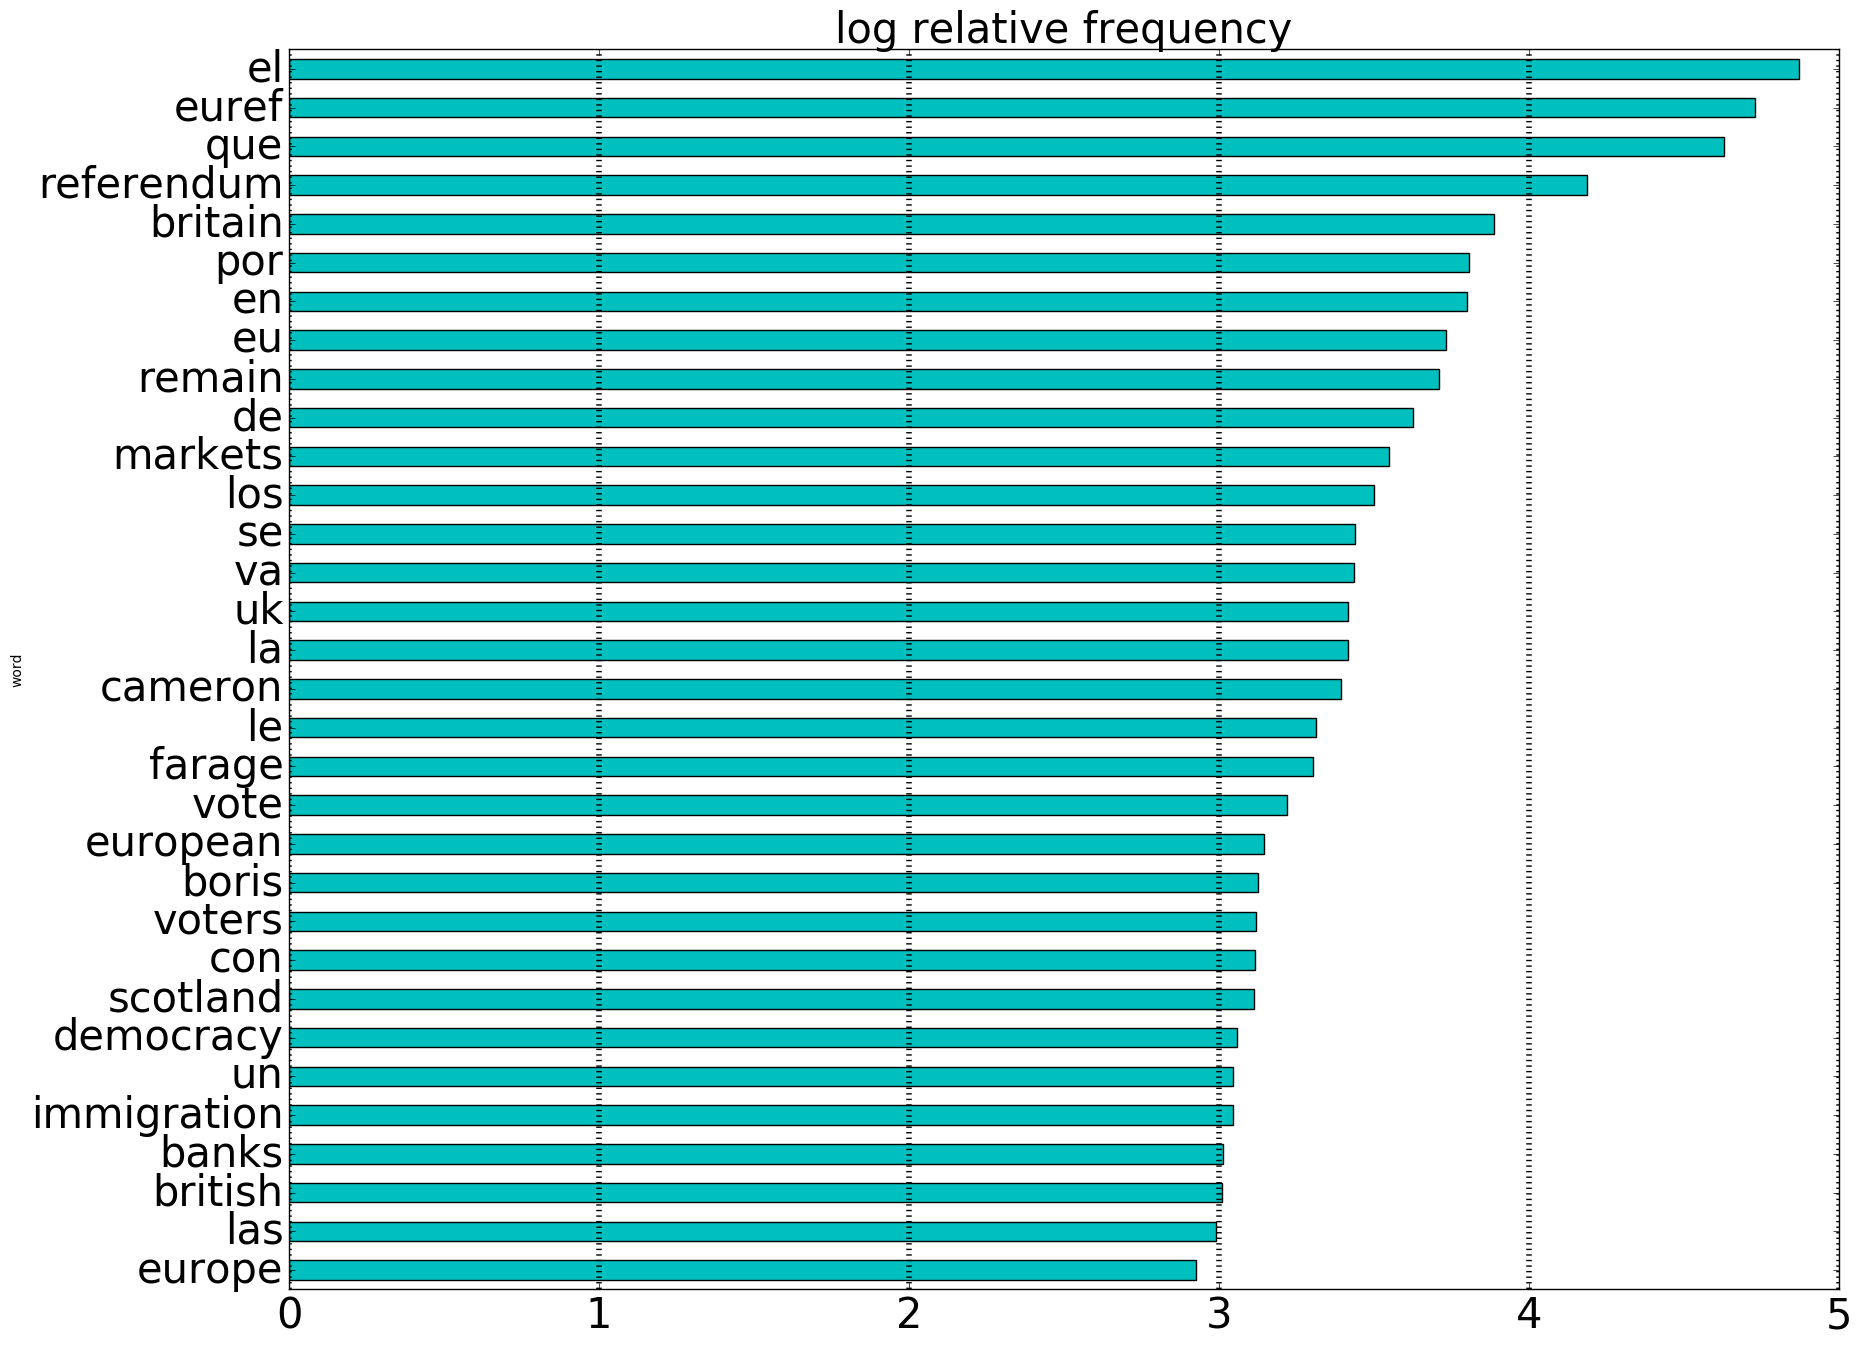

In [22]:
num_words_to_plot = 32
background_cutoff = 2000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## At least 10,000 background occurrences: 

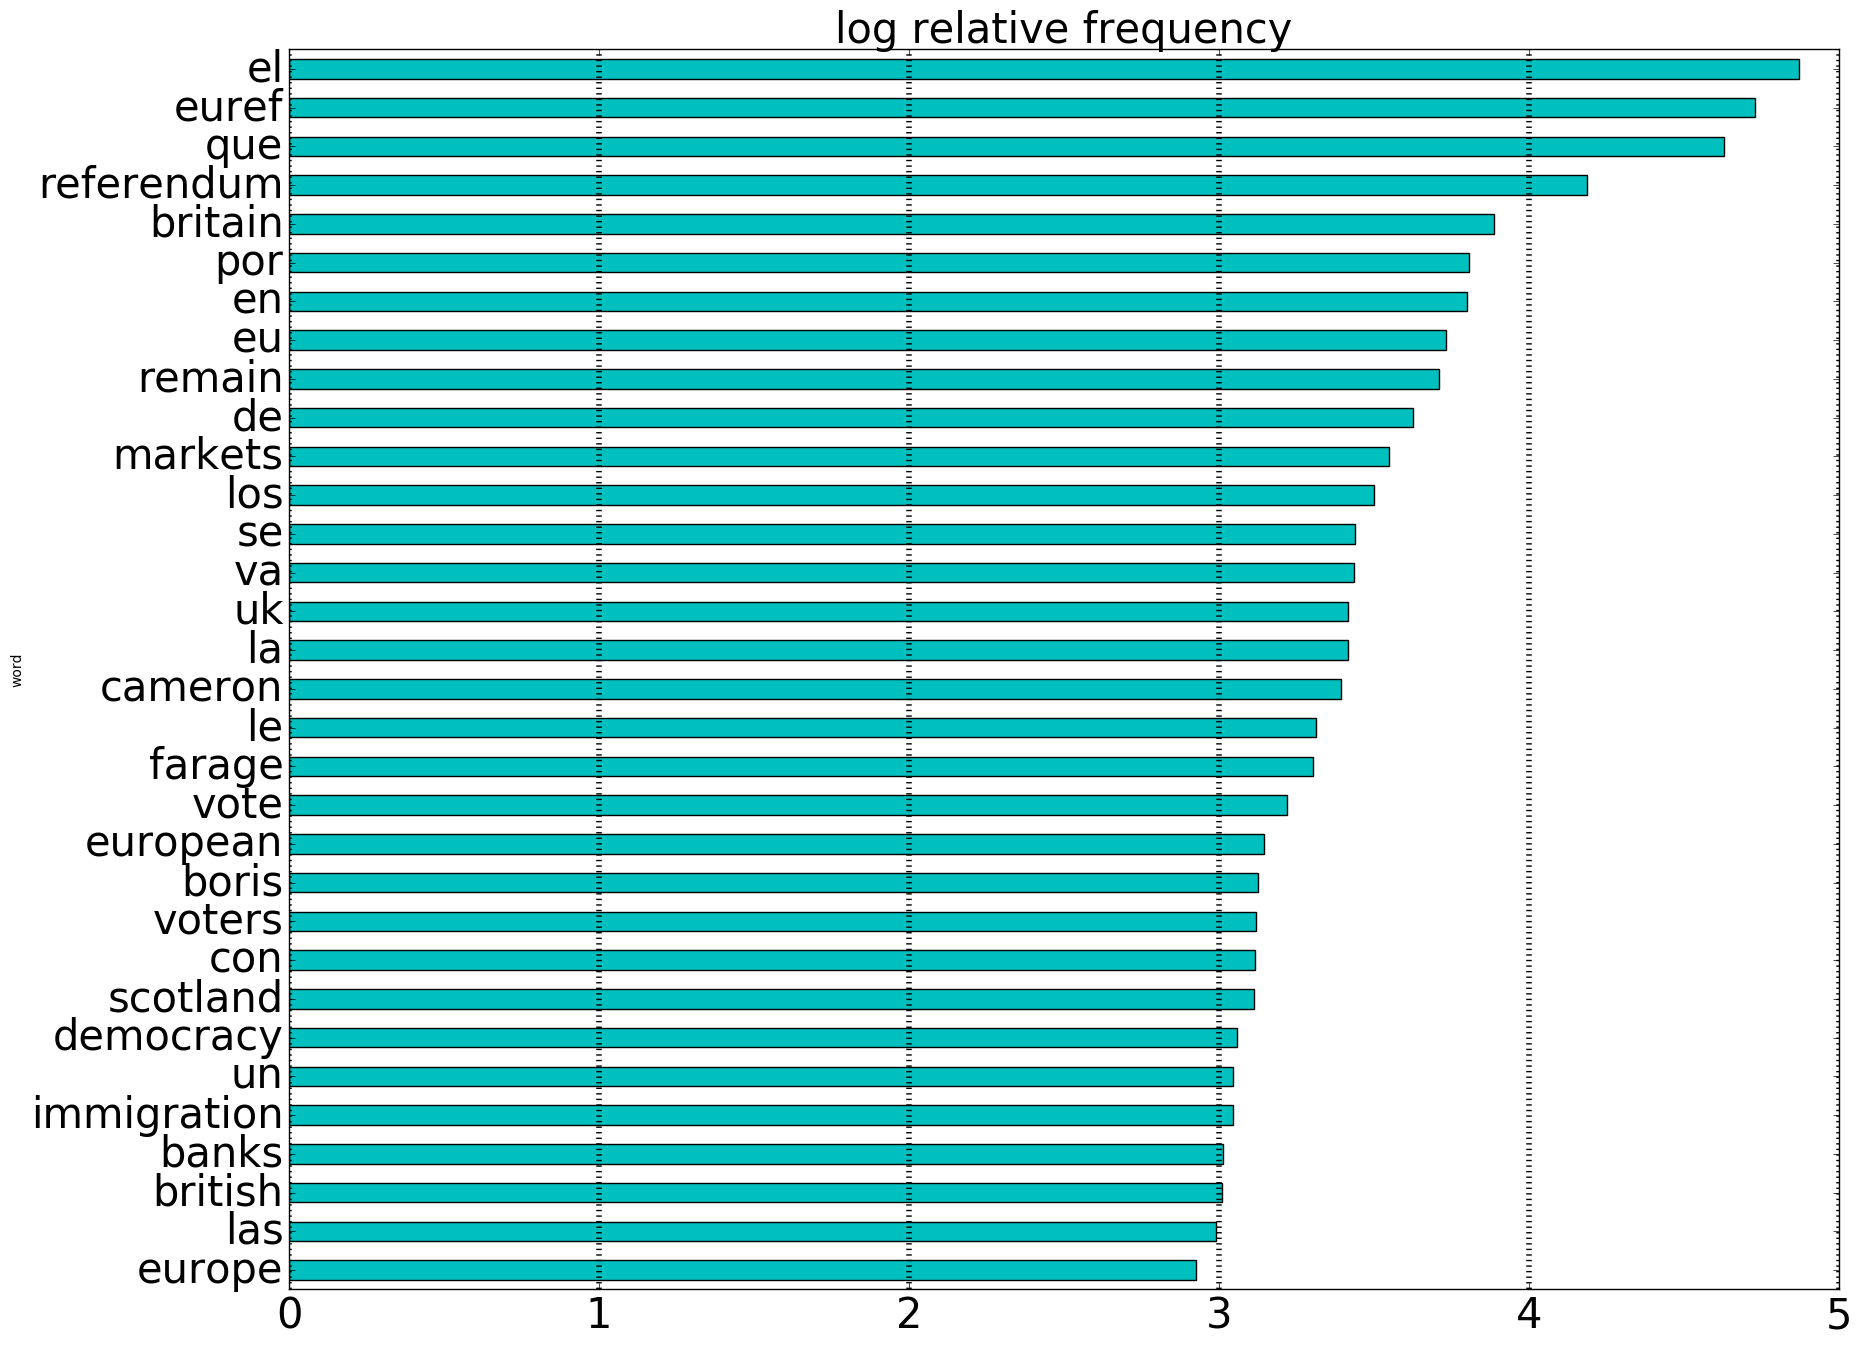

In [23]:
num_words_to_plot = 32
background_cutoff = 2000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);